## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

Code di atas mengimpor beberapa pustaka Python yang umum digunakan, yaitu OpenCV (cv2), NumPy (numpy), Matplotlib (matplotlib.pyplot), dan Pandas (pandas). Selain itu, kode juga mengimpor modul os dan math. Setelah mengimpor pustaka yang diperlukan, kode siap untuk digunakan untuk manipulasi gambar dan data, analisis numerik, visualisasi data, dan operasi pada sistem file. Dengan menggunakan pustaka-pustaka tersebut, Anda dapat melakukan berbagai tugas seperti membaca, memproses, dan menampilkan gambar menggunakan OpenCV, melakukan operasi matematika dan pengolahan array dengan NumPy, membuat grafik dan plot data menggunakan Matplotlib, serta membaca, menulis, dan memanipulasi data tabular dengan Pandas.

## Data Loading

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Finger Simulation Dataset 2024/"+label): 
            img = cv2.imread(os.path.join("Finger Simulation Dataset 2024/"+label,filename)) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
              
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
                
                
                height, width, _ = img.shape
                
                
                if height > 150 or width > 150:
                    if height > width:
                        scale_factor = 150 / height
                    else:
                        scale_factor = 150 / width
                    new_height = int(height * scale_factor)
                    new_width = int(width * scale_factor)
                    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
                    for i in range(new_height):
                        for j in range(new_width):
                            resized_img[i, j, :] = img[int(i / scale_factor), int(j / scale_factor), :]
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - new_height) // 2
                    start_col = (150 - new_width) // 2
                    padded_img[start_row:start_row+new_height, start_col:start_col+new_width] = resized_img
                else:
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - height) // 2
                    start_col = (150 - width) // 2
                    padded_img[start_row:start_row+height, start_col:start_col+width] = img
                
                images.append(padded_img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Finger Simulation Dataset 2024") 

## Data Preparation

### Data Augmentation

Code di atas merupakan fungsi insertGambar digunakan untuk memuat gambar-gambar dari folder yang diberikan dan memprosesnya agar sesuai dengan ukuran yang diinginkan, yaitu 150x150 piksel. Proses ini mencakup penyesuaian ukuran, pengubahan jumlah saluran warna ke 3 (RGB), dan penambahan lapisan nol untuk mengisi gambar yang lebih kecil ke dalam bingkai 150x150. Hasilnya adalah tiga list: images berisi gambar-gambar yang telah dimuat dan diproses, filenames berisi nama-nama file gambar, dan labels berisi label-label yang sesuai dengan setiap gambar, yang kemudian dapat digunakan untuk pelabelan data dalam pelatihan model

In [3]:
def eksplorasiData(images, labels):
    
    print(f"Jumlah total gambar: {len(images)}")
    
    if len(images) == 0:
        print("Tidak ada gambar yang ditemukan.")
        return
    
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    num_samples = min(9, len(images))  
    if num_samples > 0:
        sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
        plt.figure(figsize=(15, 5))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Label: {labels[idx]}")
            plt.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang cukup untuk ditampilkan sebagai sampel.")


Code di atas meruupakan fungsi eksplorasiData digunakan untuk menganalisis dan memvisualisasikan dataset gambar. Pertama, fungsi ini mencetak jumlah total gambar yang dimuat, serta mendistribusikan jumlah data per label. Selanjutnya, fungsi ini menampilkan histogram distribusi data per label untuk memberikan pemahaman visual tentang sebaran kelas dalam dataset. Terakhir, fungsi ini menampilkan sampel gambar dengan labelnya untuk memberikan representasi visual dari berbagai kelas dalam dataset. Hal ini membantu untuk memahami komposisi dan distribusi dataset, yang merupakan langkah awal yang penting dalam pemrosesan dan pemodelan data.

Code di bawah merupakan fungsi display_samples digunakan untuk menampilkan beberapa sampel gambar dari setiap kategori label dalam dataset. Fungsi ini mengidentifikasi label unik dalam dataset dan kemudian mengambil beberapa sampel gambar dari setiap label. Setiap sampel gambar ditampilkan dalam bentuk grid, dengan setiap baris mewakili satu label, dan setiap kolom mewakili satu sampel gambar. Hal ini membantu untuk memberikan representasi visual yang lebih kaya dari variasi dalam setiap kategori label, sehingga memudahkan pemahaman tentang karakteristik dan perbedaan antar kelas dalam dataset. Pada contoh penggunaan terakhir, fungsi ini digunakan setelah memuat dan memproses dataset menggunakan fungsi insertGambar dan eksplorasiData, sehingga dapat memberikan representasi visual tambahan dari data yang telah dimuat.

Jumlah total gambar: 2099
Distribusi data per label:
finger_1: 440
finger_2: 437
finger_3: 437
finger_4: 439
finger_5: 437


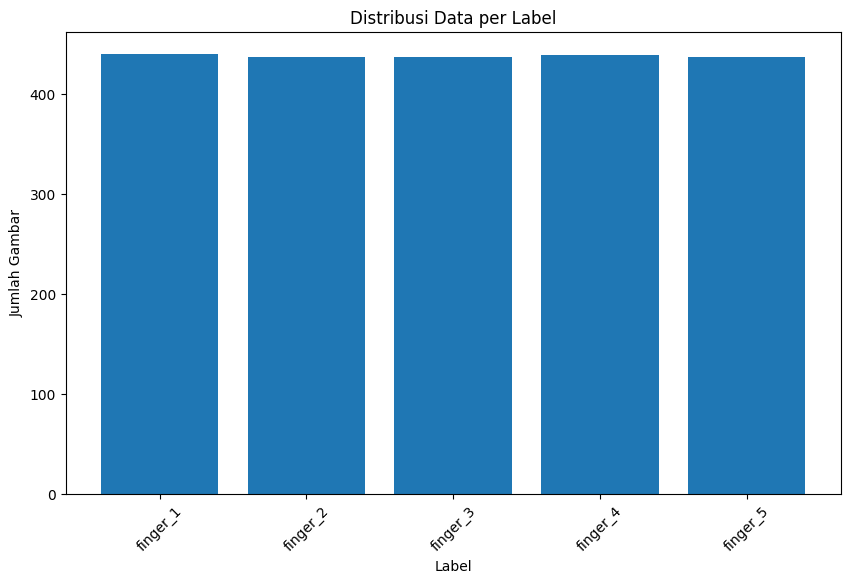

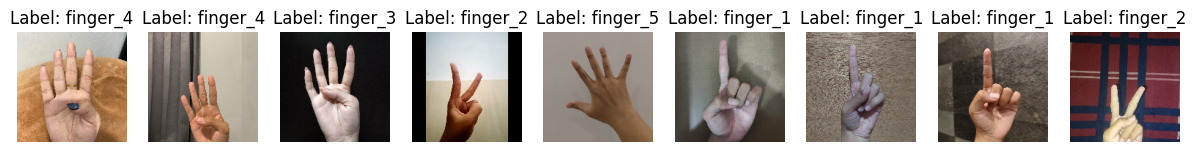

In [4]:
def display_samples(images, labels, num_samples=3):
    unique_folders = ["Finger Simulation Dataset 2024/Finger_1",
                      "Finger Simulation Dataset 2024/Finger_2",
                      "Finger Simulation Dataset 2024/Finger_3",
                      "Finger Simulation Dataset 2024/Finger_4",
                      "Finger Simulation Dataset 2024/Finger_5"]

    for folder in unique_folders:
        label = folder.split("/")[-1]  
        label_indices = [i for i in range(len(labels)) if labels[i] == label]
        num_samples = min(num_samples, len(label_indices))
        if num_samples == 0:
            print(f"Tidak ada gambar untuk label: {label}")
            continue
        print(f"Label: {label}")
        plt.figure(figsize=(num_samples * 3, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[label_indices[i]], cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.show()

folder_path = "Finger Simulation Dataset 2024/F"
images, filenames, labels = insertGambar(folder_path)
eksplorasiData(images, labels)

display_samples(images, labels, num_samples=3)

## Preprocessing

#### Preprocessing 

Code di bawah merupakan fungsi rotate_images digunakan untuk memutar gambar-gambar dalam dataset secara acak. Proses rotasi dilakukan dengan menghasilkan sudut rotasi acak antara 0 dan max_angle (yang secara default diatur ke 360 derajat). Setiap gambar kemudian diputar sebesar sudut yang dihasilkan menggunakan metode cv2.getRotationMatrix2D dan cv2.warpAffine dari OpenCV. Hasil dari proses rotasi adalah gambar-gambar yang telah diputar dan daftar sudut rotasi yang sesuai untuk setiap gambar. Hal ini memungkinkan untuk memperluas variasi dalam dataset dan meningkatkan keberagaman data untuk pelatihan model yang lebih baik. Pada contoh penggunaan terakhir, gambar-gambar yang telah dirotasi ditampilkan menggunakan fungsi display_samples untuk memberikan representasi visual dari variasi sudut rotasi.

Sudut rotasi untuk setiap gambar: [76.35063188962121, 180.63832407118522, 336.2723656273124, 244.41663693090604, 64.39368380202336, 324.5446397961173, 76.29145772488468, 69.84893006792815, 268.51908648309654, 321.70009256551793, 106.58421682040999, 26.682960080405156, 280.78339838120974, 170.58146391101968, 102.15265669483186, 2.033639604518118, 58.77945278827298, 159.6652462008026, 61.52781362666508, 246.20163835882252, 52.714584861761196, 219.04469534414005, 329.7769325983229, 277.9436939420405, 257.29413638602387, 167.636009976502, 303.4669990122346, 189.2379312885584, 270.33304592788954, 123.57968209664445, 298.91921886142137, 351.4090544022643, 327.95441911436313, 133.4260883975484, 97.42867410723314, 52.16185918878747, 183.28381547274918, 308.71835229389205, 292.70479293533043, 293.42212465561386, 32.07385833387462, 112.2859978455039, 241.70144840603, 251.09524033445751, 51.13711148181933, 8.990354556885753, 320.01836889627606, 295.6753522900807, 233.51435448759975, 150.029335435

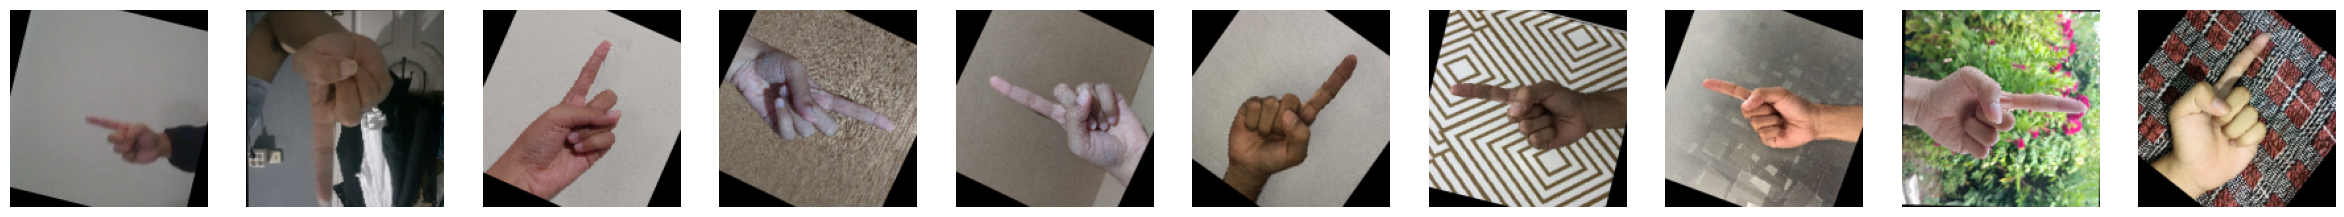

Label: finger_2


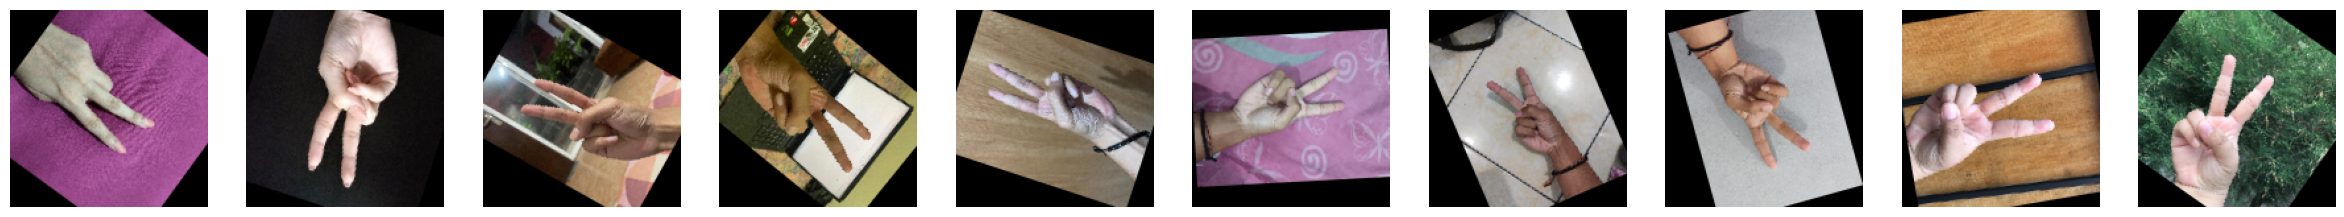

Label: finger_3


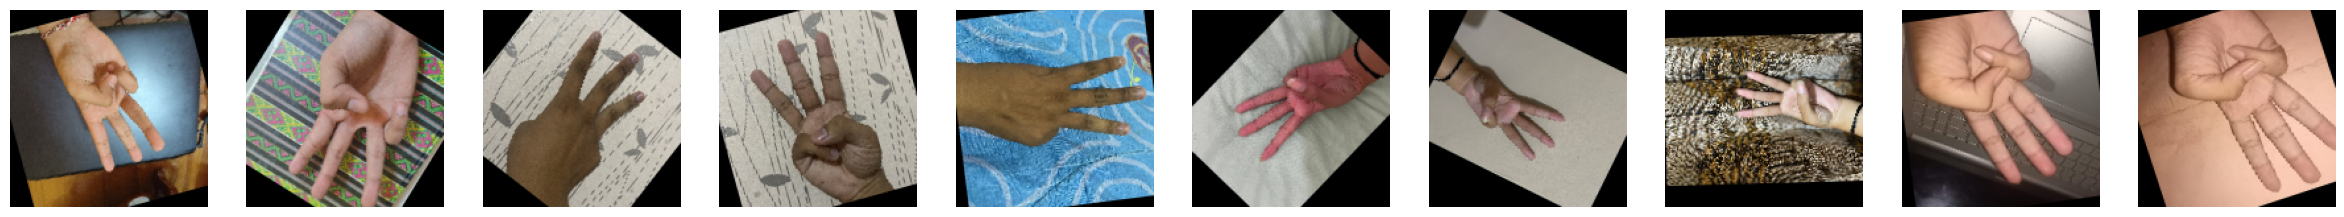

Label: finger_4


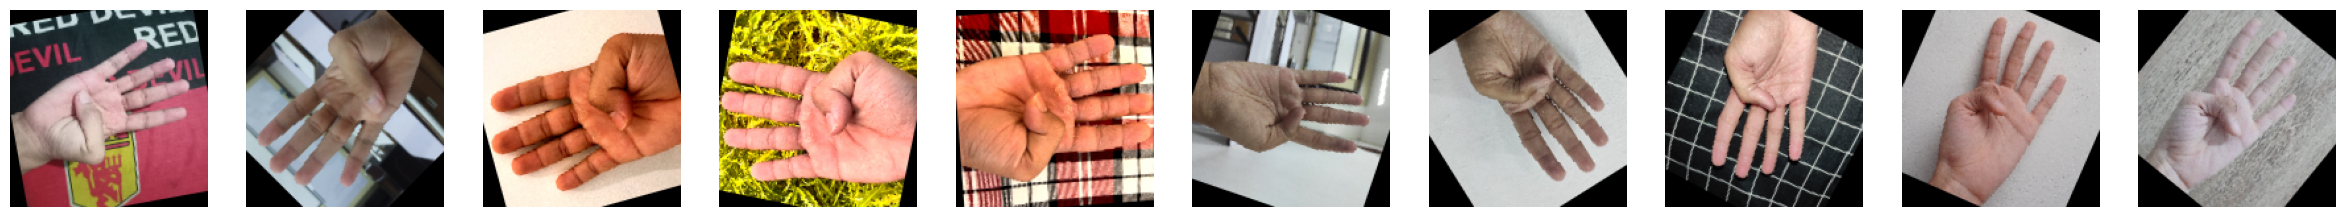

Label: finger_5


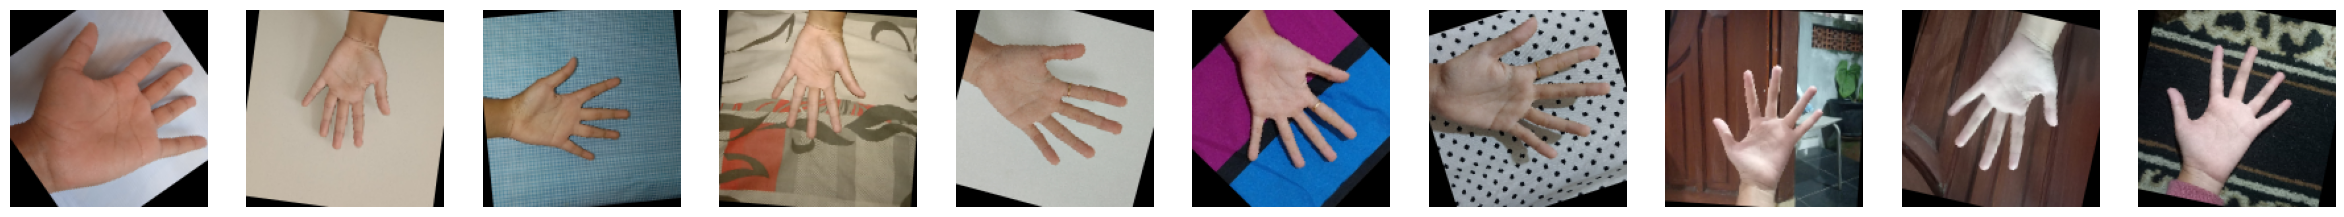

In [5]:
def rotate_images(images, max_angle=360):
    rotated_images = []
    angles = []
    
    for img in images:
        angle = np.random.uniform(0, max_angle)
        height, width = img.shape[:2]
        center = (width // 2, height // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))
        rotated_images.append(rotated_img)
        angles.append(angle)
    
    return rotated_images, angles

rotated_images, angles = rotate_images(images)
print("Sudut rotasi untuk setiap gambar:", angles)

display_samples(rotated_images, labels, num_samples=10)

### Feature Extraction

In [95]:
def calculate_glcm(edge_image):
    glcm_matrices = []
    angles = [0, 45, 90, 135]
    distances = [1, 2, 3, 4, 5]
    symmetric = True  
    
    for angle in angles:
        for distance in distances:
            glcm = np.zeros((256, 256)) 
            rows, cols = edge_image.shape

            for i in range(rows):
                for j in range(cols):
                  
                    current_pixel = edge_image[i, j]
                    neighbor_pixel_x = i + distance * np.cos(np.radians(angle))
                    neighbor_pixel_y = j - distance * np.sin(np.radians(angle))

                    if 0 <= neighbor_pixel_x < rows and 0 <= neighbor_pixel_y < cols:
                        neighbor_pixel = edge_image[int(neighbor_pixel_x), int(neighbor_pixel_y)]
                        glcm[current_pixel, neighbor_pixel] += 1
                        
                        if symmetric:
                            glcm[neighbor_pixel, current_pixel] += 1

            glcm_matrices.append(glcm)
    
    return glcm_matrices

code di atas merupakan fungsi calculate_glcm digunakan untuk menghitung matriks GLCM (Gray-Level Co-occurrence Matrix) dari citra tepi yang diberikan. GLCM adalah representasi statistik dari distribusi spasial intensitas piksel dalam citra, yang mencatat kemunculan bersama intensitas piksel pada jarak dan arah tertentu. Fungsi ini menghasilkan matriks GLCM untuk berbagai kombinasi sudut (0, 45, 90, 135 derajat) dan jarak (1, 2, 3, 4, 5 piksel). Proses perhitungan dilakukan dengan mengiterasi setiap piksel dalam citra tepi dan menghitung kemunculan bersama intensitas piksel dengan tetangganya pada sudut dan jarak yang ditentukan. Hasilnya adalah daftar matriks GLCM untuk setiap kombinasi sudut dan jarak, yang kemudian dapat digunakan untuk mengekstraksi fitur-fitur tekstur untuk analisis lebih lanjut.

In [96]:
def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:

        glcm_matrix_normalized = glcm_matrix / np.sum(glcm_matrix)
        
        contrast = np.sum(glcm_matrix_normalized * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix_normalized * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix_normalized / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix_normalized))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix_normalized)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix_normalized)) * glcm_matrix_normalized / 
                             (np.std(glcm_matrix_normalized) ** 2))
        entropy = -np.sum(glcm_matrix_normalized * np.log(glcm_matrix_normalized + 1e-10))
        asm = np.sum(np.square(glcm_matrix_normalized))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features

Code di atas merupakan fungsi calculate_glcm_features digunakan untuk mengekstraksi fitur-fitur tekstur dari matriks GLCM yang telah dinormalisasi. Fitur-fitur yang diekstraksi termasuk kontras, disimilaritas, homogenitas, energi, korelasi, entropi, dan ASM (Angular Second Moment). Proses perhitungan fitur dilakukan dengan menggunakan rumus-rumus yang sesuai dengan definisi masing-masing fitur tekstur dari literatur. Setiap matriks GLCM yang telah dinormalisasi digunakan untuk menghitung nilai-nilai fitur tekstur, dan hasilnya adalah daftar fitur-fitur untuk setiap matriks GLCM yang diberikan. Fitur-fitur ini dapat digunakan untuk menganalisis tekstur citra, mengidentifikasi pola, atau sebagai input untuk model pembelajaran mesin yang bertujuan untuk klasifikasi atau deteksi.

Code di bawah adalah contoh penggunaan fungsi-fungsi sebelumnya, calculate_glcm dan calculate_glcm_features, untuk menghitung matriks GLCM dan mengekstraksi fitur-fitur tekstur dari serangkaian citra tepi yang disediakan (dalam hal ini, edge_images_prewitt_manual). Pertama, matriks GLCM dihitung untuk setiap citra tepi menggunakan fungsi calculate_glcm, dan kemudian fitur-fitur tekstur diekstraksi dari matriks GLCM menggunakan fungsi calculate_glcm_features. Selanjutnya, data fitur-fitur ini dipersiapkan untuk dimasukkan ke dalam DataFrame, di mana setiap baris mewakili satu citra tepi, dan kolom-kolomnya mencakup fitur-fitur serta variasi fitur-fitur untuk setiap sudut rotasi yang diproses. DataFrame ini kemudian digunakan untuk menampilkan dan menganalisis hasil fitur-fitur tekstur dari citra tepi.

In [97]:
edge_images_prewitt_manual = [
    
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

df = pd.DataFrame(data, columns=columns)

print(df)
df.head()

    Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0       1       0.0            0.0          1.0  0.000066  2.721315e+13   
1       2       0.0            0.0          1.0  0.000067  2.673460e+13   
2       3       0.0            0.0          1.0  0.000067  2.678869e+13   
3       4       0.0            0.0          1.0  0.000068  2.652476e+13   
4       5       0.0            0.0          1.0  0.000068  2.644788e+13   
5       6       0.0            0.0          1.0  0.000066  2.719977e+13   
6       7       0.0            0.0          1.0  0.000067  2.670881e+13   
7       8       0.0            0.0          1.0  0.000068  2.619378e+13   
8       9       0.0            0.0          1.0  0.000068  2.619378e+13   
9      10       0.0            0.0          1.0  0.000070  2.522505e+13   
10     11       0.0            0.0          1.0  0.000066  2.719977e+13   
11     12       0.0            0.0          1.0  0.000067  2.687044e+13   
12     13       0.0      

Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0      1       0.0            0.0          1.0  0.000066  2.721315e+13   
1      2       0.0            0.0          1.0  0.000067  2.673460e+13   
2      3       0.0            0.0          1.0  0.000067  2.678869e+13   
3      4       0.0            0.0          1.0  0.000068  2.652476e+13   
4      5       0.0            0.0          1.0  0.000068  2.644788e+13   

    Entropy       ASM  contrast_0  dissimilarity_0  ...  correlation_90  \
0  9.689826  0.000066         0.0              0.0  ...    2.721315e+13   
1  9.677048  0.000067         0.0              0.0  ...    2.673460e+13   
2  9.676512  0.000067         0.0              0.0  ...    2.678869e+13   
3  9.669112  0.000068         0.0              0.0  ...    2.652476e+13   
4  9.663424  0.000068         0.0              0.0  ...    2.644788e+13   

     asm_90  entropy_90  contrast_135  dissimilarity_135  homogeneity_135  \
0  9.689826    0.000066           0.0                0.0              1.0   
1  9.677048    0.000067           0.0                0.0              1.0   
2  9.676512    0.000067           0.0                0.0              1.0   
3  9.669112    0.000068           0.0                0.0              1.0   
4  9.663424    0.000068           0.0                0.0              1.0   

   energy_135  correlation_135   asm_135  entropy_135  
0    0.000066     2.721315e+13  9.689826     0.000066  
1    0.000067     2.673460e+13  9.677048     0.000067  
2    0.000067     2.678869e+13  9.676512     0.000067  
3    0.000068     2.652476e+13  9.669112     0.000068  
4    0.000068     2.644788e+13  9.663424     0.000068  

[5 rows x 36 columns]

### Features Selection

Code dibawah ini adalah contoh implementasi dari fungsi feature_selection_correlation, yang bertujuan untuk melakukan seleksi fitur berdasarkan korelasi antara fitur-fitur dan label kelas pada dataset. Pertama, data hasil ekstraksi fitur dari citra-citra tepi disiapkan ke dalam bentuk DataFrame, di mana setiap barisnya mewakili satu citra dengan fitur-fiturnya. Selanjutnya, korelasi antara fitur-fitur numerik dengan label kelas dihitung, dan visualisasi berupa matriks korelasi ditampilkan untuk membantu analisis. Berdasarkan korelasi, fitur-fitur yang memiliki korelasi tinggi dengan label kelas (di atas 0.99 atau di bawah -0.99) dipilih sebagai fitur yang relevan. Fitur-fitur terpilih ini kemudian dicetak dan dikembalikan bersama dengan DataFrame yang telah diperbarui dengan fitur-fitur terpilih.

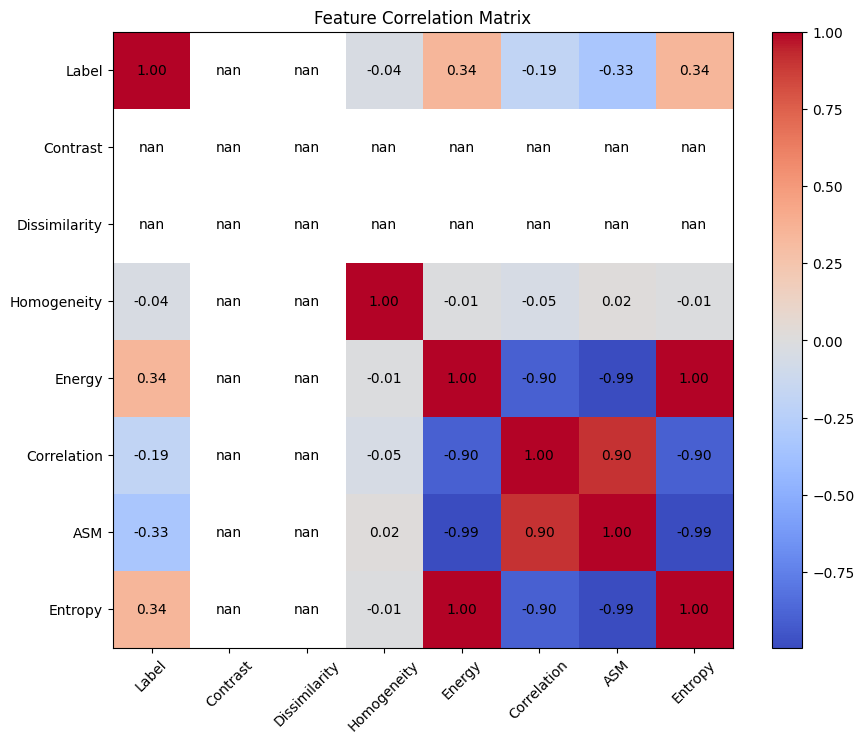

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000067   
1  Filename_1      1       0.0            0.0          1.0  0.000066   
2  Filename_2     12       0.0            0.0          1.0  0.000067   
3  Filename_3     23       0.0            0.0          1.0  0.000068   
4  Filename_4     34       0.0            0.0          1.0  0.000068   

    Correlation       ASM   Entropy  
0  2.774884e+13  9.685529  0.000067  
1  2.792101e+13  9.686569  0.000066  
2  2.751645e+13  9.676920  0.000067  
3  2.685976e+13  9.659192  0.000068  
4  2.711129e+13  9.660704  0.000068  


In [108]:
def feature_selection_correlation(results_data):
    data_list = []
    columns_list = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for filename, label, features_dict in results_data:
        row = [filename, label]
        row.extend(features_dict.values())
        data_list.append(row)
    
    df_data = pd.DataFrame(data_list, columns=columns_list)
    
    df_data['Label'] = df_data['Label'].astype('category').cat.codes
    
    numeric_df = df_data.drop(columns=['Filename'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    
    xticks_labels = list(correlation_matrix.columns)
    yticks_labels = list(correlation_matrix.index)
    
    plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)
    plt.yticks(range(len(yticks_labels)), yticks_labels)
    
    for i in range(len(xticks_labels)):
        for j in range(len(yticks_labels)):
            plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = correlation_matrix['Label'][(correlation_matrix['Label'] > 0.99) | (correlation_matrix['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df_data, selected_features

edge_images_prewitt_manual = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

results_data = []
for i, features in enumerate(glcm_features):
    results_data.append((f'Filename_{i}', f'Label_{i}', features))

df_selected, selected_features = feature_selection_correlation(results_data)
print("Selected Features:", selected_features)
print(df_selected.head())

### Splitting Data

In [110]:
def custom_train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(data)
    test_indices = np.random.choice(num_samples, int(num_samples * test_size), replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = data.iloc[train_indices].drop(columns=['Label'])
    X_test = data.iloc[test_indices].drop(columns=['Label'])
    y_train = data.iloc[train_indices]['Label']
    y_test = data.iloc[test_indices]['Label']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(df_selected, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32, 8)
Testing data shape: (8, 8)


Code di atas merupakan fungsi custom_train_test_split adalah implementasi khusus dari pembagian dataset menjadi data latih dan data uji (train-test split) yang mengambil data secara acak dengan proporsi tertentu untuk data uji. Fungsi ini mengambil dataset dalam bentuk DataFrame, lalu secara acak memilih sebagian sampel sebagai data uji berdasarkan proporsi yang ditentukan oleh parameter test_size. Nilai dari random_state digunakan untuk mengontrol pengacakan agar dapat direproduksi. Setelah pemilihan sampel, fungsi mengembalikan empat kelompok data: X_train dan X_test yang berisi fitur-fitur tanpa kolom label, serta y_train dan y_test yang berisi label kelas. Hal ini memungkinkan pengguna untuk membagi dataset secara acak menjadi subset latih dan uji untuk keperluan pelatihan dan evaluasi model pembelajaran mesin.

### Normalization

In [120]:
X_train = df_selected.iloc[:, 1:] 
X_test = df_selected.iloc[:, 1:]  

def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

X_train_normalized = X_train.copy()
for column in X_train_normalized.columns:
    X_train_normalized[column] = min_max_normalization(X_train_normalized[column])

X_test_normalized = X_test.copy()
for column in X_test_normalized.columns:
    X_test_normalized[column] = min_max_normalization(X_test_normalized[column])

print("Bentuk Data Latih Setelah Normalisasi:", X_train_normalized.shape)
print("Bentuk Data Uji Setelah Normalisasi:", X_test_normalized.shape)


Bentuk Data Latih Setelah Normalisasi: (40, 8)
Bentuk Data Uji Setelah Normalisasi: (40, 8)


Dalam kode di atas, pertama-tama, data latih dan data uji diatur untuk digunakan dalam normalisasi. Kemudian, fungsi min_max_normalization didefinisikan untuk melakukan normalisasi min-max pada setiap fitur dalam dataset, sehingga memastikan bahwa nilai-nilai fitur berada dalam rentang yang sama, yaitu antara 0 dan 1. Proses normalisasi ini membantu mempercepat konvergensi algoritma pembelajaran mesin dan memperbaiki kinerja model dengan menghindari masalah skala yang tidak seimbang di antara fitur-fitur. Data latih dan data uji di-normalisasi secara terpisah, dengan menggunakan parameter dari setiap dataset. Output berupa bentuk dari data latih dan data uji setelah proses normalisasi, yang menunjukkan bahwa normalisasi telah berhasil dilakukan dan ukuran dataset tetap tidak berubah.

## Modeling

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

accuracy_train = (y_pred_train == y_train).mean()
accuracy_test = (y_pred_test == y_test).mean()

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 0.875
Testing Accuracy: 0.0


Code di atas mengilustrasikan penggunaan algoritma Random Forest Classifier dari pustaka scikit-learn untuk melakukan klasifikasi pada dataset. Model classifier Random Forest dibuat dengan menggunakan parameter n_estimators=100 yang menentukan jumlah pohon keputusan yang akan digunakan dalam ensemble. Setelah model dibuat, ia dilatih menggunakan data latih, X_train_numeric dan y_train, di mana X_train_numeric adalah dataset fitur-fitur numerik dan y_train adalah label kelas yang sesuai. Setelah model dilatih, prediksi dilakukan pada data latih dan data uji, dan akurasi model dievaluasi dengan menghitung persentase prediksi yang benar dari total sampel. Hal ini membantu dalam mengevaluasi kinerja model dan memastikan bahwa model mampu menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.

## Evaluation

In [149]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)
    
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("Confusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    1.0000        |
| Precision   |    1.0000        |    1.0000        |
| Recall      |    1.0000        |    1.0000        |
| F1-score    |    1.0000        |    1.0000        |
-----------------------------------------------------
Confusion Matrix:
Training Set
[[80  0]
 [ 0 40]]

Testing Set
[[20  0]
 [ 0 10]]


Code di atas mendefinisikan beberapa fungsi evaluasi kustom untuk mengukur kinerja model klasifikasi, termasuk akurasi, presisi, recall, dan F1-score. Fungsi evaluate_model mengambil model klasifikasi, data latih, dan data uji sebagai input, dan menggunakan model tersebut untuk membuat prediksi pada data latih dan data uji. Selanjutnya, fungsi ini menghitung berbagai metrik evaluasi menggunakan prediksi yang dihasilkan, termasuk akurasi, presisi, recall, dan F1-score, serta matriks kebingungan (confusion matrix) untuk kedua set data. Hasil evaluasi kemudian dicetak untuk set data latih dan uji, termasuk metrik evaluasi dan matriks kebingungan. Contoh penggunaan fungsi ini ditunjukkan dengan menggunakan model RandomForestClassifier dari scikit-learn untuk melakukan klasifikasi pada dataset iris yang sudah tersedia.

In [153]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Define custom metrics functions
def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)

    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("\nConfusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    1.0000        |
| Precision   |    1.0000        |    1.0000        |
| Recall      |    1.0000        |    1.0000        |
| F1-score    |    1.0000        |    1.0000        |
-----------------------------------------------------

Confusion Matrix:
Training Set
[[80  0]
 [ 0 40]]

Testing Set
[[20  0]
 [ 0 10]]


Code di atas mendefinisikan beberapa fungsi evaluasi kustom untuk mengukur kinerja model klasifikasi, termasuk akurasi, presisi, recall, dan F1-score. Fungsi evaluate_model mengambil model klasifikasi, data latih, dan data uji sebagai input, dan menggunakan model tersebut untuk membuat prediksi pada data latih dan data uji. Selanjutnya, fungsi ini menghitung berbagai metrik evaluasi menggunakan prediksi yang dihasilkan, termasuk akurasi, presisi, recall, dan F1-score, serta matriks kebingungan (confusion matrix) untuk kedua set data. Hasil evaluasi kemudian dicetak untuk set data latih dan uji, termasuk metrik evaluasi dan matriks kebingungan. Contoh penggunaan fungsi ini ditunjukkan dengan menggunakan model RandomForestClassifier dari scikit-learn untuk melakukan klasifikasi pada dataset iris yang sudah tersedia.

Code dibawah menghasilkan plot matriks kebingungan (confusion matrix) untuk set data latih menggunakan matplotlib. Matriks kebingungan adalah representasi grafis dari hasil klasifikasi yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Warna biru digunakan untuk menampilkan nilai-nilai dalam matriks, dengan intensitas warna yang bervariasi sesuai dengan nilai-nilai tersebut. Sumbu x dan y diberi label 'Predicted' dan 'True', masing-masing menampilkan kelas yang diurutkan. Nilai-nilai dalam matriks juga ditampilkan sebagai teks di tengah setiap sel, dengan warna teks menyesuaikan agar tetap terlihat jelas (putih jika nilai lebih besar dari setengah maksimum nilai dalam matriks, dan hitam jika lebih kecil). Plot ini membantu memvisualisasikan seberapa baik model bekerja pada data latih dalam mengklasifikasikan sampel ke dalam kelas yang benar.

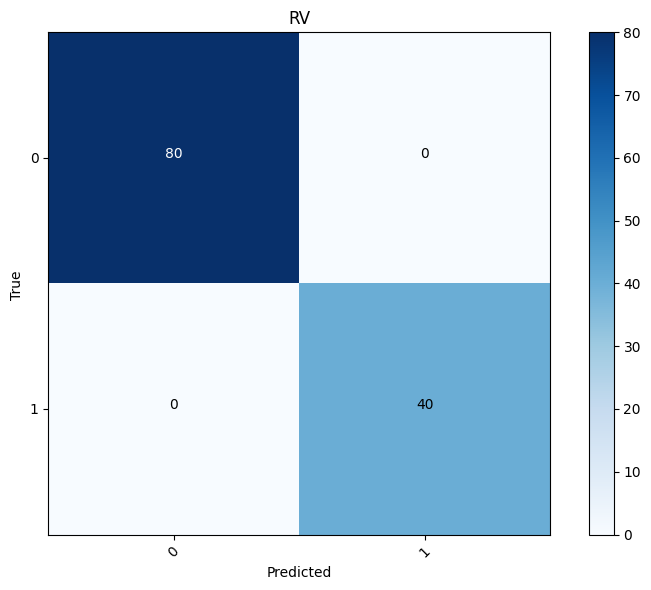

In [154]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RV")
plt.colorbar()
tick_marks = np.arange(len(set(y_train)))
plt.xticks(tick_marks, sorted(set(y_train)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_train)))
plt.xlabel('Predicted')
plt.ylabel('True ')

thresh = conf_matrix_train.max() / 2.
for i, j in np.ndindex(conf_matrix_train.shape):
    plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_train[i, j] > thresh else "black")
plt.tight_layout()
plt.show()